<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch05_10_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%8B%A4%EC%8A%B5_%EB%B9%84%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.10. 사이킷런 실습 - 비선형회귀분석

---
* 날짜:
* 이름:

## 학습내용
    - 다항식을 이용한 회귀 분석을 진행한다.
    - 랜덤 포레스트를 이용해 비선형 회귀를 진행한다.
    - 앙상블 학습에 대해 이해한다.

```
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/script')
from data_loader import *
from score_dict import *

## **선형 회귀 모델을 다항 회귀로 변환**
---

### **| 간단한 데이터에 대한 다항 회귀**

#### **데이터**
```
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0]).reshape(-1, 1)

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])
```

* 데이터 생성

In [4]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0]).reshape(-1, 1)

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])
X.shape, y.shape


((10, 1), (10,))

* 시각화

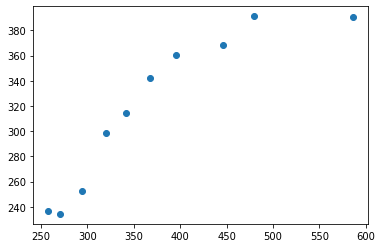

In [5]:
plt.scatter(X, y)

#### **선형 특성 학습**

In [6]:
from sklearn.linear_model import *
lr1 = LinearRegression()
lr1.fit(X, y)

LinearRegression()

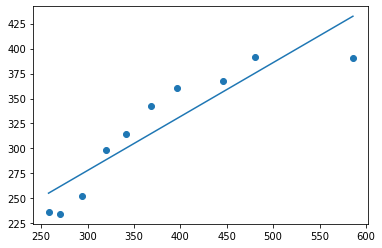

In [7]:
plt.scatter(X, y)
y_pred = lr1.predict(X)
plt.plot(X, y_pred)

In [ ]:
# 직선보다는 곡선이 더 맞는 모델 같아보이기 때문에 다항식을 이용

#### **이차항 특성 학습**


In [8]:
from sklearn.preprocessing import PolynomialFeatures
# X가 1차항 -> 다차항으로 변환
quad = PolynomialFeatures(degree = 2) # 차수 지정

* X 데이터 변환

In [9]:
X_quad = quad.fit_transform(X)
X.shape, X_quad.shape

((10, 1), (10, 3))

In [10]:
quad.get_feature_names_out()
pd.DataFrame(X_quad, columns = quad.get_feature_names_out())

,1,x0,x0^2
0,1.0,258.0,66564.0
1,1.0,270.0,72900.0
2,1.0,294.0,86436.0
3,1.0,320.0,102400.0
4,1.0,342.0,116964.0
5,1.0,368.0,135424.0
6,1.0,396.0,156816.0
7,1.0,446.0,198916.0
8,1.0,480.0,230400.0
9,1.0,586.0,343396.0


In [ ]:
X

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

In [ ]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

* 학습

In [11]:
lr2 = LinearRegression()
lr2.fit(X_quad, y)

LinearRegression()

#### **테스트셋 성능 비교**

In [12]:
y_pred1 = lr1.predict(X)
lr1_scores = regression_scores(y, y_pred)

y_pred2 = lr2.predict(X_quad)
lr2_scores = regression_scores(y, y_pred2)

pd.DataFrame([lr1_scores,lr2_scores], index = ['linear','quad'])

,mse,rmse,mae,nmae,mape,r2
linear,569.78,23.870,21.898,0.069,7.035,0.832
quad,61.33,7.831,6.379,0.020,2.213,0.982


#### **그래프 시각화**

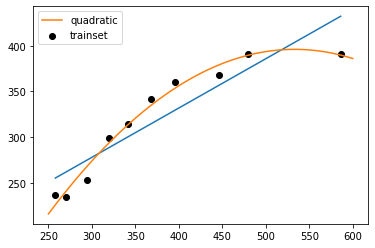

In [13]:
X_every = np.arange(250, 600, 0.1).reshape(-1,1)
plt.scatter(X, y, label='trainset', c='k')
plt.plot(X, lr1.predict(X))
plt.plot(X_every, lr2.predict(quad.fit_transform(X_every)), label='quadratic')
plt.legend()

### **| 주택 데이터를 이용한 비선형 회귀 분석**



#### **주택 데이터셋**

[https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

    
<pre>
01. CRIM     도시의 인당 범죄율
02. ZN       2만 5,0000평방 피트가 넘는 주택 비율
03. INDUS    도시에서 소매 업종이 아닌 지역 비율
04. CHAS     찰스 강 인접 여부(강 주변=1, 그외=0)
05. NOX      일산화질소 농도(10ppm당)
06. RM       주택의 평균 방 개수
07. AGE      1940년 이전에 지어진 자가 주택 비율
08. DIS      다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
09. RAD      방사형으로 뻗은 고속도로까지 접근성 지수
10. TAX      10만 달러당 재산세율
11. PTRATIO  도시의 학생-교사 비율
12. B        1000(Bk - 0.63)^2 도시의 아프리카계 미국인 비율
13. LSTAT    저소득층 비율
14. MEDV     자가 주택의 중간가격 (단위 $1000s)
</pre>



* 데이터 불러오기


In [14]:
X_train, X_test, y_train, y_test = housing_loader(['LSTAT']) # 속성 선택
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(506, 14)


((404, 1), (102, 1), (404,), (102,))

* 시각화

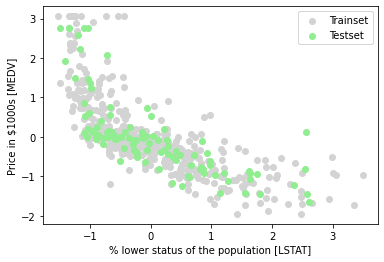

In [ ]:
def draw_data():
  plt.scatter(X_train, y_train, label='Trainset', color='lightgray')
  plt.scatter(X_test, y_test, label='Testset', color='lightgreen')
  plt.xlabel('% lower status of the population [LSTAT]')
  plt.ylabel('Price in $1000s [MEDV]')
  plt.legend()
draw_data()

#### **선형 모델 학습**

In [ ]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

#### **이차 다항 모델 학습**

In [ ]:
lr2 = LinearRegression()
quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X_train)
lr2.fit(X_quad, y_train)

LinearRegression()

#### **삼차 다항 모델 학습**

In [ ]:
lr3 = LinearRegression()
cubic = PolynomialFeatures(degree = 3)
X_cubic = cubic.fit_transform(X_train)
lr3.fit(X_cubic, y_train)

LinearRegression()

#### **테스트셋 성능 비교**

In [ ]:
# 예측
y_pred1 = lr1.predict(X_test)
y_pred2 = lr2.predict(quad.fit_transform(X_test))  # 2차항 변환
y_pred3 = lr3.predict(cubic.fit_transform(X_test))  # 3차항 변환

# 성능 평가
lr1_scores = regression_scores(y_test, y_pred1)
lr2_scores = regression_scores(y_test, y_pred2)
lr3_scores = regression_scores(y_test, y_pred3)

df_scores = pd.DataFrame([lr1_scores,lr2_scores, lr3_scores], index = ['linear', 'quad', 'cubic'])
df_scores.style.background_gradient(cmap='Greens_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quad,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000


#### **그래프 시각화**

<function matplotlib.pyplot.show>

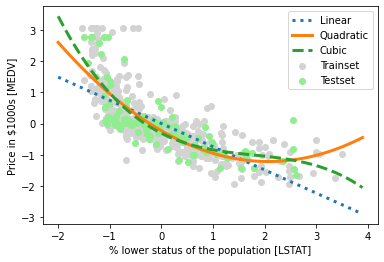

In [ ]:
draw_data()
X_every = np.arange(-2,4,0.1).reshape(-1,1)
plt.plot(X_every, lr1.predict(X_every), label = 'Linear', linewidth =3, linestyle =':') # 1차항
plt.plot(X_every, lr2.predict(quad.transform(X_every)), label = 'Quadratic', linewidth =3) # 2차항
plt.plot(X_every, lr3.predict(cubic.transform(X_every)), label = 'Cubic', linewidth =3, linestyle ='--') # 3차항
plt.legend()
plt.show

## **랜덤 포레스트를 사용하여 비선형 관계 다루기**
---

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F96F6N%2FbtqwVglgV2S%2FYTCytd7Z2egbnbJM29MJv1%2Fimg.png)

*출처:  ratsgo's blog

### **| 결정트리 회귀**
* Decision Tree

#### **모델 학습**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 1, max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

#### **테스트셋 성능비교**

In [ ]:
y_pred = tree.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['tree'] = score
df_scores
df_scores.style.background_gradient(cmap='Greens_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quad,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000


#### **그래프 시각화**

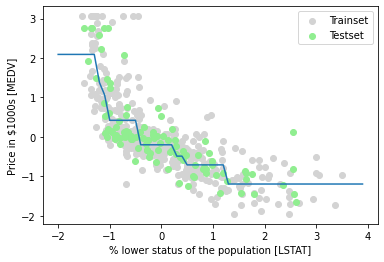

In [ ]:
draw_data()
plt.plot(X_every, tree.predict(X_every))
plt.show()

### **| 랜덤 포레스트 회귀 (Random Forest Regressor)**

#### **모델 학습**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state = 1)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

#### **테스트셋 성능 비교**

In [ ]:
y_pred = forest.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['forest'] = score
df_scores
df_scores.style.background_gradient(cmap='Greens_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quad,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000
forest,0.439000,0.663000,0.476000,0.685000,478.131000,0.561000


#### **그래프 시각화**

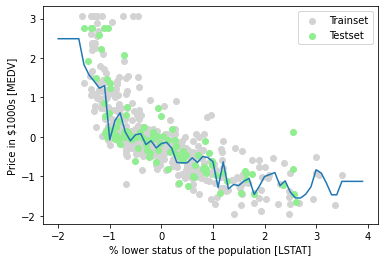

In [ ]:
draw_data()
plt.plot(X_every, forest.predict(X_every))
plt.show()

### **| 엑스트라 트리 (Extra Tree Regressor)**

#### **모델 학습**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(random_state = 1)
et.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

#### **테스트셋 성능 비교**

In [ ]:
y_pred = et.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['et'] = score
df_scores
df_scores.style.background_gradient(cmap='Greens_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quad,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000
forest,0.439000,0.663000,0.476000,0.685000,478.131000,0.561000
et,0.438000,0.662000,0.477000,0.686000,417.761000,0.562000


#### **그래프 시각화**

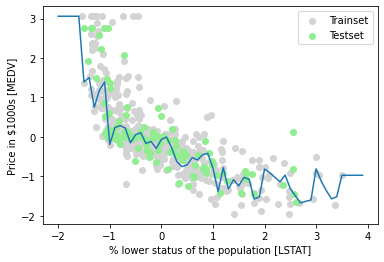

In [ ]:
draw_data()
plt.plot(X_every, et.predict(X_every))
plt.show()

### **| Gradient Boosting Regressor**

#### **모델 학습**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 1)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

#### **테스트셋 성능 비교**

In [ ]:
y_pred = gb.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['gb'] = score
df_scores
df_scores.style.background_gradient(cmap='Greens_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quad,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000
forest,0.439000,0.663000,0.476000,0.685000,478.131000,0.561000
et,0.438000,0.662000,0.477000,0.686000,417.761000,0.562000
gb,0.336000,0.580000,0.409000,0.588000,410.178000,0.664000


#### **그래프 시각화**

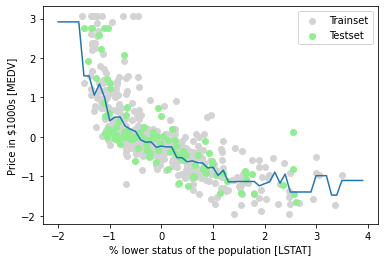

In [ ]:
draw_data()
plt.plot(X_every, gb.predict(X_every))
plt.show()

### **| XGBoost Regressor**

#### **모델 학습**

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 1)
xgb.fit(X_train, y_train)

[05:14:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

#### **테스트셋 성능 비교**

In [ ]:
y_pred = xgb.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['xgb'] = score
df_scores
df_scores.style.background_gradient(cmap='Greens_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quad,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000
forest,0.439000,0.663000,0.476000,0.685000,478.131000,0.561000
et,0.438000,0.662000,0.477000,0.686000,417.761000,0.562000
gb,0.336000,0.580000,0.409000,0.588000,410.178000,0.664000
xgb,0.322000,0.567000,0.400000,0.574000,400.252000,0.678000


#### **그래프 시각화**

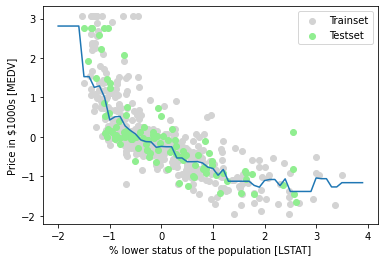

In [ ]:
draw_data()
plt.plot(X_every, xgb.predict(X_every))
plt.show()

## **과제1: 주택 데이터셋 다중 회귀 분석**
---

* 주택 데이터셋의 X의 모든 속성을 이용해 y를 예측합니다.
* 지난시간과 이번시간에 배운 회귀 분석 모델을 모두 사용해보고, 성능을 비교해 봅니다.
* 단, 다항회귀는 사용하지 마세요.
* 사용 모델 : 
```
'linear', 'ridge', 'lasso', 'elastic', 'bayes_ridge', 'tree', 'forest', 'et', 'gb', 'xgb'
```

#### **데이터 불러오기**

In [ ]:
X_train, X_test, y_train, y_test = housing_loader() # 속성 선택
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(506, 14)


((404, 13), (102, 13), (404,), (102,))

* 분석 예시

In [ ]:
from sklearn.linear_model import*
linear = LinearRegression()
linear.fit(X_train, y_train) 

LinearRegression()

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
elastic = ElasticNet(alpha = 1)
elastic.fit(X_train, y_train)

ElasticNet(alpha=1)

In [ ]:
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = bayes_ridge.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['bayes_ridge'] = score
df_scores
df_scores.style.background_gradient(cmap='Greens_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.222000,0.471000,0.362000,0.521000,579.145000,0.778000
quad,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000
forest,0.439000,0.663000,0.476000,0.685000,478.131000,0.561000
et,0.438000,0.662000,0.477000,0.686000,417.761000,0.562000
gb,0.336000,0.580000,0.409000,0.588000,410.178000,0.664000
xgb,0.322000,0.567000,0.400000,0.574000,400.252000,0.678000
ridge,0.222000,0.471000,0.362000,0.520000,579.405000,0.778000
lasso,0.315000,0.561000,0.421000,0.606000,549.237000,0.685000


In [ ]:
# 성능을 비교해 볼때 가장 좋은 것은 ridge, bayes_ridge 두 모델이다. 
# (R2 값이 너무 낮으면 적절하지 않은 모델이다. 그러므로 elastic은 전반적으로 좋은 수치지만 적절하지 않다.)

## **과제2: 해외 축구 선수 이적료 예측 미션**
---

* https://dacon.io/competitions/open/235538/overview/description
* 수업 시간에 배운 내용들을 적용하여 이적료 예측을 진행하고 리더보드에 결과를 제출합니다.

In [16]:
df=pd.read_csv('/content/sample_data/FIFA_train.csv')
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [17]:
df.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [19]:
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [20]:
df.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

In [21]:
for col in df.columns:
  n_unique = len(df[col].unique())
  print(col, len(df[col].unique()))

id 8932
name 8932
age 25
continent 5
contract_until 17
position 4
prefer_foot 2
reputation 5
stat_overall 46
stat_potential 45
stat_skill_moves 5
value 198


In [22]:
df.continent.unique()

array(['south america', 'europe', 'africa', 'asia', 'oceania'],
      dtype=object)

In [23]:
df = df.drop(['id','name'], axis = 1) # id 와 name 은 필요없는 데이터이기 때문에 삭제
df.loc[df.position == 'GK','position'] = 1 # 각각의 포지션을 숫자 범주로 변경 (GK=1, ST=2, MF=3, DF=4) 
df.loc[df.position == 'ST','position'] = 2
df.loc[df.position == 'MF','position'] = 3
df.loc[df.position == 'DF','position'] = 4

In [24]:
df.loc[df.prefer_foot == 'left','prefer_foot'] = 0  # 왼발을 0, 오른발을 1로 설정
df.loc[df.prefer_foot == 'right','prefer_foot'] = 1

In [25]:
df.loc[df.continent == 'south america','continent'] = 1  # south america = 1 각 대륙을 번호로 설정
df.loc[df.continent == 'europe','continent'] = 2  # europe = 2
df.loc[df.continent == 'africa','continent'] = 3  # africa = 3
df.loc[df.continent == 'asia','continent'] = 4  # asia = 4
df.loc[df.continent == 'oceania','continent'] = 5  # oceania = 5

In [26]:
df # 전처리 완료

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,1,2021,2,0,5.0,94,94,4.0,110500000.0
1,27,2,2020,1,1,4.0,91,93,1.0,72000000.0
2,31,1,2021,2,1,5.0,91,91,3.0,80000000.0
3,32,2,2020,4,1,4.0,91,91,3.0,51000000.0
4,25,2,2021,1,1,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...
8927,18,3,2019,3,1,1.0,48,63,3.0,60000.0
8928,19,2,2020,4,1,1.0,47,59,2.0,40000.0
8929,18,1,2021,4,1,1.0,47,64,2.0,50000.0
8930,18,2,2021,1,1,1.0,47,65,1.0,50000.0
